This code is designed to take quantative behavioral data (ie HT/min) over a timecourse (ie HT_20 min post drug),
taking filename as a long data format (.xlsx or .csv) 
columns:
    'mouse_id' , 'group_id' , 'behavior_time'

and an XXX_input_dict.py file with treatment_mapping and experimental_info 
#TODO right now filename must be manuely set in init_dict.py also! .csv / xlsx matters? because filename is defined in it

1. Plot a single time point with stats using singleHistogram()

2. Plot all timepoints for a single behavior using behaviorHistogram()




In [ ]:
#INITIATE FILE SYSTEM
from main import *


In [1]:
from main import *

filename = 'TCB2_data_HT.xlsx'

%run tcb2_input_dict.py #filename is redefined in here
# %run DOI_input_dict.py


treatment_mapping SAVED TO /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT SUBCACHE
experimental_info SAVED TO /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT SUBCACHE


In [2]:
# FETCH DF
getRawDf(filename)
# subselectDf(getRawDf(filename), {"treatment": "vehicles", "experiment": "dose_response"})


RETRIEVED "raw_df" FROM "TCB2_data_HT" CACHE


,mouse_id,group_id,HT_20,HT_30,HT_40,HT_50,treatment,color,experiment
0,13,2,1,1,0,2,0.3mg/kgTCB,salmon,dose_response
1,14,2,1,3,4,1,0.3mg/kgTCB,salmon,dose_response
2,15,2,2,0,0,0,0.3mg/kgTCB,salmon,dose_response
3,16,3,7,8,7,4,3mg/kgTCB,red,dose_response
3,16,3,7,8,7,4,3mg/kgTCB,red,agonist_antagonist
...,...,...,...,...,...,...,...,...,...
52,67,1,0,0,0,0,vehicles,white,dose_response
52,67,1,0,0,0,0,vehicles,white,agonist_antagonist
53,68,4,3,4,3,3,10mg/kgTCB,firebrick,dose_response
54,69,6,0,1,2,0,TCB+MDL,black,agonist_antagonist


RETRIEVED "raw_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "raw_df" FROM "TCB2_data_HT" CACHE

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  28.108037  5.636770e-09

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB    2.8000  0.0003  1.1886  4.4114    True
1  0.3mg/kgTCB   3mg/kgTCB    4.1182  0.0000  2.6338  5.6025    True
2  0.3mg/kgTCB    vehicles   -0.5333  0.8421 -2.2876  1.2210   False
3   10mg/kgTCB   3mg/kgTCB    1.3182  0.1281 -0.2604  2.8967   False
4   10mg/kgTCB    vehicles   -3.3333  0.0001 -5.1680 -1.4986    True
5    3mg/kgTCB    vehicles   -4.6515  0.0000 -6.3757 -2.9274    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HT" CACHE
CACHED /Users/jasminebutler/Desktop/phd_behavior/input/cache/TCB2_data_HT/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00

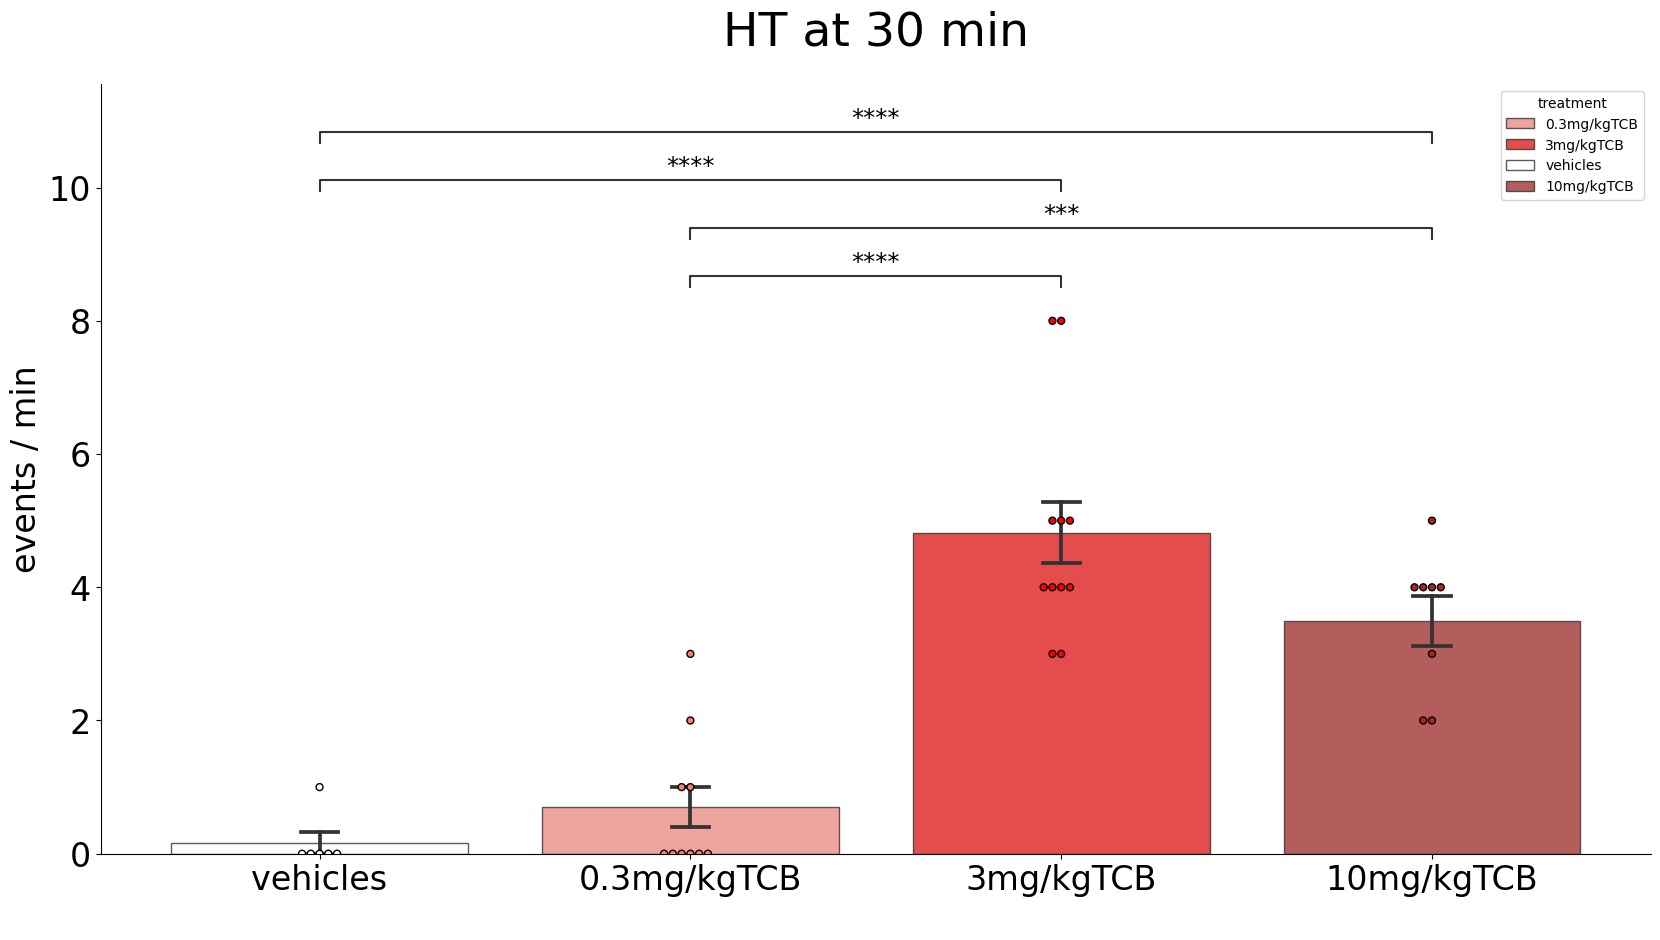

SAVED /Users/jasminebutler/Desktop/phd_behavior/output/head_twitch_histogram_dose_response_for_HT_30.svg
SAVED /Users/jasminebutler/Desktop/phd_behavior/output/head_twitch_histogram_dose_response_for_HT_30.png


In [3]:
#BEHQVIOR HISTOGRAMS

singleHistogram(
    filename,
    experiment='dose_response',
    vairable='HT_30',
    outlier_test=None,
    p_value_threshold=0.05,
    from_scratch=True,
)


RETRIEVED "raw_df" FROM "TCB2_data_HT" CACHE

TWO_WAY_ANOVA SIGNIFICANT
       Source       SS    DF       MS       F  p-unc   np2
0        TCB2  121.684   1.0  121.684  34.552    0.0  0.49
1         MDL   -0.000   1.0   -0.000  -0.000    1.0 -0.00
2  TCB2 * MDL   99.531   1.0   99.531  28.262    0.0  0.44
3    Residual  126.784  36.0    3.522     NaN    NaN   NaN

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  85.733301  6.245866e-16

TUKEY SIGNIFICANT
        group1     group2  meandiff   p-adj   lower   upper  reject
0  0.2mg/kgMDL  3mg/kgTCB    5.3636  0.0000  4.3233  6.4040    True
1  0.2mg/kgMDL    TCB+MDL    0.6364  0.3642 -0.4040  1.6767   False
2  0.2mg/kgMDL   vehicles    0.3333  0.8835 -0.8962  1.5629   False
3    3mg/kgTCB    TCB+MDL   -4.7273  0.0000 -5.7425 -3.7120    True
4    3mg/kgTCB   vehicles   -5.0303  0.0000 -6.2387 -3.8219    True
5      TCB+MDL   vehicles   -0.3030  0.9050 -1.5114  0.9054   False
RETRIEVED "quantitative_stats" FROM "TCB2_data_HT" CACHE


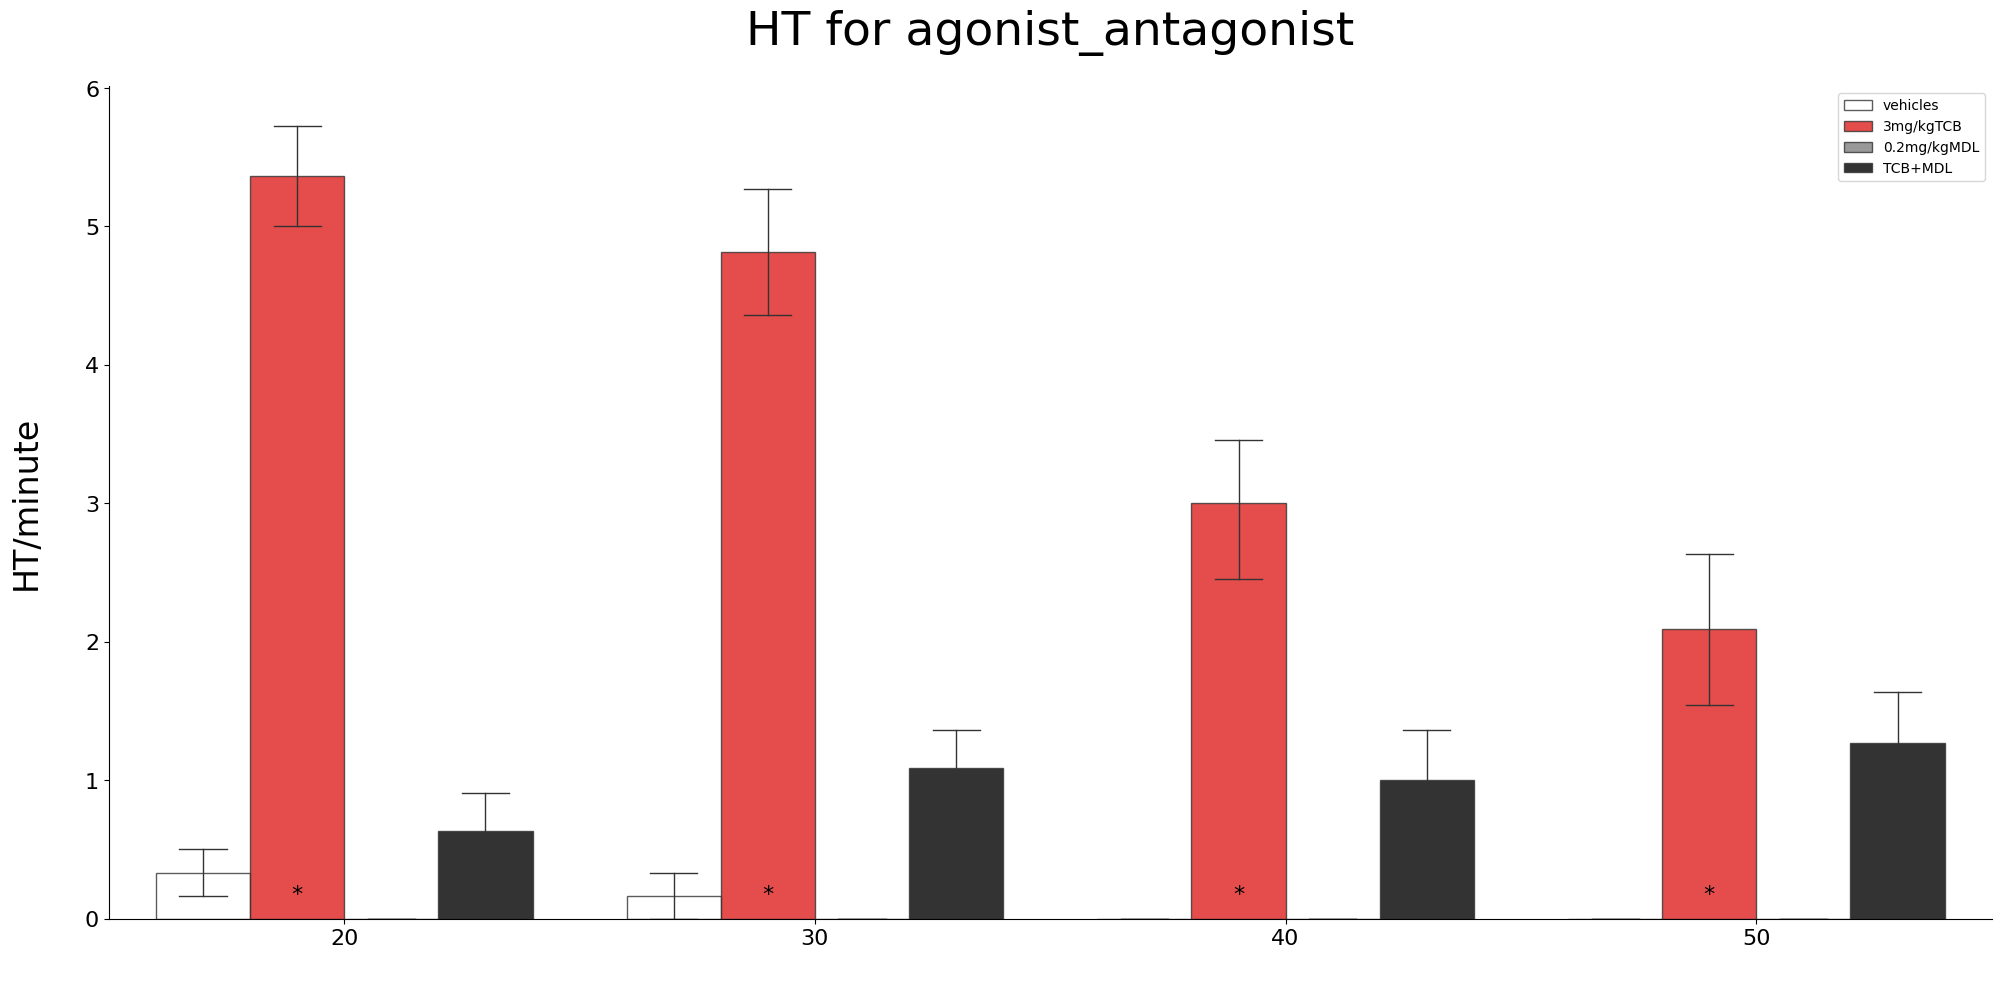

SAVED /Users/jasminebutler/Desktop/phd_behavior/output/behavior_histogram_agonist_antagonist_for_HT.svg
SAVED /Users/jasminebutler/Desktop/phd_behavior/output/behavior_histogram_agonist_antagonist_for_HT.png


In [5]:
# BEHAVIORAL HISTOGRAM

behaviorHistogram( filename, 
                  experiment = 'agonist_antagonist', # agonist_antagonist dose_response
                  behavior = 'HT', 
                  p_value_threshold = 0.05,
                  from_scratch = True 
                  )


In [5]:
getStats(filename)

RETRIEVED "quantitative_stats" FROM "DOI_data_HT_ES" CACHE


,behavior,experiment,time,test,p_value_threshold,is_significant,p_value,result
0,HT,dose_response,10,one_way_anova,0.05,True,0.0,F p_value 0 43.446222 8.471...
0,HT,dose_response,10,tukey,0.05,True,"[[(0.03mg/kgDOI_orange, 0.3mg/kgDOI_orange), (...",group1 group2 me...
0,HT,dose_response,20,one_way_anova,0.05,True,0.0,F p_value 0 33.728159 3.757...
0,HT,dose_response,20,tukey,0.05,True,"[[(0.03mg/kgDOI_orange, 0.3mg/kgDOI_orange), (...",group1 group2 me...
0,HT,dose_response,30,one_way_anova,0.05,True,0.0,F p_value 0 39.798684 3.243...
0,HT,dose_response,30,tukey,0.05,True,"[[(0.03mg/kgDOI_orange, 0.3mg/kgDOI_orange), (...",group1 group2 me...
0,HT,dose_response,40,one_way_anova,0.05,True,0.0,F p_value 0 30.752701 1.401...
0,HT,dose_response,40,tukey,0.05,True,"[[(0.03mg/kgDOI_orange, 0.3mg/kgDOI_orange), (...",group1 group2 me...
0,HT,dose_response,49,one_way_anova,0.05,True,0.0,F p_value 0 18.701986 8.467...
0,HT,dose_response,49,tukey,0.05,True,"[[(0.03mg/kgDOI_orange, 0.3mg/kgDOI_orange), (...",group1 group2 me...


In [ ]:
#TODO add plsd to posth hoc not hard code tukeys
#add outlier detection
